In [ ]:
# CDC EDA
# Anita Sun

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv')

In [5]:
df.shape

(16794, 14)

In [6]:
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [8]:
df['Indicator'].value_counts()

Symptoms of Depressive Disorder                        5598
Symptoms of Anxiety Disorder                           5598
Symptoms of Anxiety Disorder or Depressive Disorder    5598
Name: Indicator, dtype: int64

In [9]:
df_anxiety = df[df['Indicator']=='Symptoms of Anxiety Disorder']

In [22]:
df_anxiety['CI'] = df_anxiety.apply(lambda x:
                    (x['Low CI'], x['High CI']),
                    axis = 1)

/tmp/ipykernel_266796/1079752585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anxiety['CI'] = df_anxiety.apply(lambda x:


In [13]:
df_anxiety['Subgroup'].unique()

array(['United States', '18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years',
       '80 years and above', 'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina

In [14]:
df_anxiety['Time Period'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72])

In [55]:
df_anxiety['Time Period Start Date'] = pd.to_datetime(df_anxiety['Time Period Start Date'])
df_anxiety['Time Period End Date'] = pd.to_datetime(df_anxiety['Time Period End Date'])

/tmp/ipykernel_266796/1231845952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anxiety['Time Period Start Date'] = pd.to_datetime(df_anxiety['Time Period Start Date'])
/tmp/ipykernel_266796/1231845952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anxiety['Time Period End Date'] = pd.to_datetime(df_anxiety['Time Period End Date'])


In [56]:
df_anxiety['Time Period End Date'].unique()

array(['2020-05-05T00:00:00.000000000', '2020-05-12T00:00:00.000000000',
       '2020-05-19T00:00:00.000000000', '2020-05-26T00:00:00.000000000',
       '2020-06-02T00:00:00.000000000', '2020-06-09T00:00:00.000000000',
       '2020-06-16T00:00:00.000000000', '2020-06-23T00:00:00.000000000',
       '2020-06-30T00:00:00.000000000', '2020-07-07T00:00:00.000000000',
       '2020-07-14T00:00:00.000000000', '2020-07-21T00:00:00.000000000',
       '2020-08-18T00:00:00.000000000', '2020-08-31T00:00:00.000000000',
       '2020-09-14T00:00:00.000000000', '2020-09-28T00:00:00.000000000',
       '2020-10-12T00:00:00.000000000', '2020-10-26T00:00:00.000000000',
       '2020-11-09T00:00:00.000000000', '2020-11-23T00:00:00.000000000',
       '2020-12-07T00:00:00.000000000', '2020-12-21T00:00:00.000000000',
       '2021-01-05T00:00:00.000000000', '2021-01-18T00:00:00.000000000',
       '2021-02-01T00:00:00.000000000', '2021-02-15T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000', '2021-03-15

In [57]:
df_anxiety['val_err_lower'] = df_anxiety['Value'] - df_anxiety['Low CI']
df_anxiety['val_err_upper'] = df_anxiety['High CI'] - df_anxiety['Value']

/tmp/ipykernel_266796/2723034777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anxiety['val_err_lower'] = df_anxiety['Value'] - df_anxiety['Low CI']
/tmp/ipykernel_266796/2723034777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anxiety['val_err_upper'] = df_anxiety['High CI'] - df_anxiety['Value']


In [58]:
df_anxiety_us = df_anxiety[df_anxiety['Subgroup']=='United States']

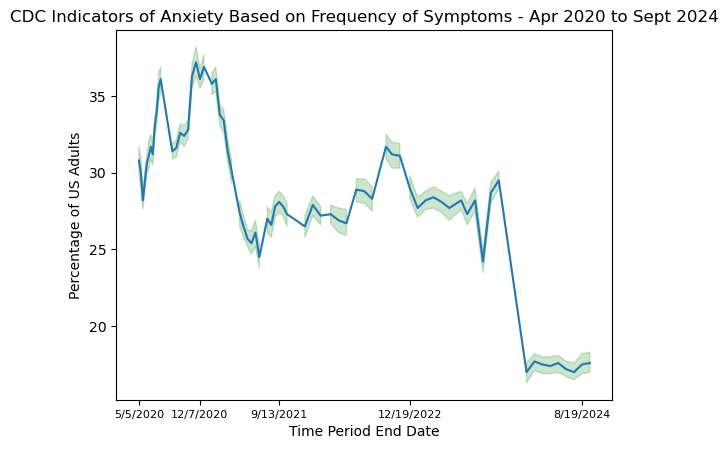

In [84]:
sns.lineplot(data=df_anxiety_us,
             x='Time Period End Date',
             y='Value',
)

plt.fill_between(df_anxiety_us['Time Period End Date'], df_anxiety_us['Low CI'], df_anxiety_us['High CI'], color='green', alpha=0.2)

'''
plt.errorbar(df_anxiety[df_anxiety['Subgroup']=='United States']['Time Period'], 
             df_anxiety[df_anxiety['Subgroup']=='United States']['Value'], 
             yerr=[df_anxiety[df_anxiety['Subgroup']=='United States']['val_err_lower'], df_anxiety[df_anxiety['Subgroup']=='United States']['val_err_upper']], 
             fmt='none', capsize=5, capthick=1, color='black')'''

plt.title('CDC Indicators of Anxiety Based on Frequency of Symptoms - Apr 2020 to Sept 2024')
plt.ylabel('Percentage of US Adults')

step = 20

plt.xticks(df_anxiety_us['Time Period End Date'][::step],
           df_anxiety_us['Time Period End Date'][::step].apply(lambda x: (str(x.month) + "/" + str(x.day) + "/" +  str(x.year))),
           fontsize='8');

In [82]:
dict_max = {i:(np.max(df_anxiety[df_anxiety['Subgroup']==i]['Value']), 
                 df_anxiety[df_anxiety['Subgroup']==i].loc[df_anxiety[df_anxiety['Subgroup']==i]['Value'].idxmax(), 'Time Period Label']) 
                 for i in df_anxiety['Subgroup'].unique()}

In [83]:
dict_max

{'United States': (37.2, 'Nov 11 - Nov 23, 2020'),
 '18 - 29 years': (51.7, 'Oct 28 - Nov 9, 2020'),
 '30 - 39 years': (44.3, 'Dec 9 - Dec 21, 2020'),
 '40 - 49 years': (41.0, 'Nov 11 - Nov 23, 2020'),
 '50 - 59 years': (36.3, 'Jan 20 - Feb 1, 2021'),
 '60 - 69 years': (30.2, 'Nov 11 - Nov 23, 2020'),
 '70 - 79 years': (24.2, 'Nov 11 - Nov 23, 2020'),
 '80 years and above': (22.5, 'Dec 9 - Dec 21, 2020'),
 'Male': (32.4, 'Jan 20 - Feb 1, 2021'),
 'Female': (42.9, 'Nov 11 - Nov 23, 2020'),
 'Hispanic or Latino': (42.2, 'Nov 11 - Nov 23, 2020'),
 'Non-Hispanic White, single race': (36.2, 'Nov 11 - Nov 23, 2020'),
 'Non-Hispanic Black, single race': (41.1, 'Dec 9 - Dec 21, 2020'),
 'Non-Hispanic Asian, single race': (35.0, 'July 16 - July 21, 2020'),
 'Non-Hispanic, other races and multiple races': (47.1,
  'Nov 11 - Nov 23, 2020'),
 'Less than a high school diploma': (46.9, 'Nov 25 - Dec 7, 2020'),
 'High school diploma or GED': (38.1, 'Dec 9 - Dec 21, 2020'),
 "Some college/Associate's 

In [86]:
dict_min = {i:(np.min(df_anxiety[df_anxiety['Subgroup']==i]['Value']), 
                 df_anxiety[df_anxiety['Subgroup']==i].loc[df_anxiety[df_anxiety['Subgroup']==i]['Value'].idxmin(), 'Time Period Label']) 
                 for i in df_anxiety['Subgroup'].unique()}

In [87]:
dict_min

{'United States': (17.0, 'Jan 9 - Feb 5, 2024'),
 '18 - 29 years': (28.3, 'May 28 - Jun 24, 2024'),
 '30 - 39 years': (21.2, 'Jan 9 - Feb 5, 2024'),
 '40 - 49 years': (17.5, 'Feb 6 - Mar 4, 2024'),
 '50 - 59 years': (13.5, 'Jun 25 - Jul 22, 2024'),
 '60 - 69 years': (9.9, 'Jun 25 - Jul 22, 2024'),
 '70 - 79 years': (5.7, 'Jan 9 - Feb 5, 2024'),
 '80 years and above': (4.6, 'Jul 23 - Aug 19, 2024'),
 'Male': (14.3, 'Apr 2 - Apr 29, 2024'),
 'Female': (19.2, 'Jan 9 - Feb 5, 2024'),
 'Hispanic or Latino': (16.6, 'Jun 25 - Jul 22, 2024'),
 'Non-Hispanic White, single race': (17.2, 'Jan 9 - Feb 5, 2024'),
 'Non-Hispanic Black, single race': (13.6, 'Jan 9 - Feb 5, 2024'),
 'Non-Hispanic Asian, single race': (9.1, 'Feb 6 - Mar 4, 2024'),
 'Non-Hispanic, other races and multiple races': (21.1,
  'Jul 23 - Aug 19, 2024'),
 'Less than a high school diploma': (17.2, 'Jun 25 - Jul 22, 2024'),
 'High school diploma or GED': (16.9, 'Jan 9 - Feb 5, 2024'),
 "Some college/Associate's degree": (19.5, '